In [1]:
! tar -xzf "Data/matrix.mtx.gz" -C data

tar: Error opening archive: Failed to open 'Data/matrix.mtx.gz'


In [2]:
import numpy as np
import pandas as pd
import scanpy as sc

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

C:\Users\88695\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\88695\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\88695\AppData\Local\Programs\Python\Python3

scanpy==1.9.3 anndata==0.9.2 umap==0.5.3 numpy==1.24.4 scipy==1.11.2 pandas==2.0.3 scikit-learn==1.3.0 statsmodels==0.14.0 python-igraph==0.10.6 pynndescent==0.5.10


C:\Users\88695\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


In [4]:
results_file = 'write/pbmc3k.h5ad'  # the file that will store the analysis results

In [5]:
adata = sc.read_10x_mtx(
    'Data/01 - Men09/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)                              # write a cache file for faster subsequent reading

... reading from cache file cache\Data-01 - Men09-matrix.h5ad


In [6]:
all_genes = list(adata.var['gene_ids'].values)  
'EGFR' in all_genes 

True

In [7]:
adata.obs

Empty DataFrame
Columns: []
Index: [MEN09_AAACCTGCACATAACC-1, MEN09_AAACCTGCATCTGGTA-1, MEN09_AAACCTGGTCTTCGTC-1, MEN09_AAACCTGTCAGAGACG-1, MEN09_AAACCTGTCGGCGCTA-1, MEN09_AAACGGGGTGTAAGTA-1, MEN09_AAACGGGGTTCCCGAG-1, MEN09_AAACGGGTCCCAGGTG-1, MEN09_AAAGATGAGAAGCCCA-1, MEN09_AAAGATGAGAATTCCC-1, MEN09_AAAGATGAGAGGTACC-1, MEN09_AAAGATGAGAGTGAGA-1, MEN09_AAAGATGAGGCATGGT-1, MEN09_AAAGATGAGTGTACGG-1, MEN09_AAAGATGCAAGCTGTT-1, MEN09_AAAGATGCAGATCGGA-1, MEN09_AAAGATGGTACCCAAT-1, MEN09_AAAGATGGTATATGAG-1, MEN09_AAAGATGTCAAGGTAA-1, MEN09_AAAGATGTCATTCACT-1, MEN09_AAAGCAAAGCCGCCTA-1, MEN09_AAAGCAAAGCTCCTTC-1, MEN09_AAAGCAACATAAAGGT-1, MEN09_AAAGCAACATCATCCC-1, MEN09_AAAGCAAGTCTAGCGC-1, MEN09_AAAGCAATCAAGCCTA-1, MEN09_AAAGCAATCATATCGG-1, MEN09_AAAGCAATCCCAGGTG-1, MEN09_AAAGCAATCTGTTTGT-1, MEN09_AAAGTAGAGATGTCGG-1, MEN09_AAAGTAGAGGCCCTCA-1, MEN09_AAAGTAGCAGGCGATA-1, MEN09_AAAGTAGCATGCAACT-1, MEN09_AAAGTAGCATTGTGCA-1, MEN09_AAATGCCAGCGTAATA-1, MEN09_AAATGCCAGTCGTACT-1, MEN09_AAATGCCAGTTATCGC-1, MEN09_AAATGCCCAGTCAGCC-1, MEN09_AAATGCCTCAGCTCTC-1, MEN09_AAATGCCTCATCGGAT-1, MEN09_AAATGCCTCCTCCTAG-1, MEN09_AACACGTAGGCGTACA-1, MEN09_AACACGTAGTAGCCGA-1, MEN09_AACACGTCAATGGTCT-1, MEN09_AACACGTCACGTCTCT-1, MEN09_AACACGTGTAAGGGCT-1, MEN09_AACACGTGTTCGTTGA-1, MEN09_AACACGTTCAAACGGG-1, MEN09_AACCATGAGAAGGCCT-1, MEN09_AACCATGAGATATGGT-1, MEN09_AACCATGAGGGCTTCC-1, MEN09_AACCATGCAAACAACA-1, MEN09_AACCATGCATCGATGT-1, MEN09_AACCATGGTACAGTGG-1, MEN09_AACCATGGTATAGGGC-1, MEN09_AACCATGGTGAGTATA-1, MEN09_AACCATGGTGGCAAAC-1, MEN09_AACCATGGTTACTGAC-1, MEN09_AACCGCGCAGGACGTA-1, MEN09_AACCGCGCAGGCGATA-1, MEN09_AACCGCGGTACATGTC-1, MEN09_AACCGCGGTACTCGCG-1, MEN09_AACCGCGGTGGACGAT-1, MEN09_AACCGCGGTTGTTTGG-1, MEN09_AACCGCGTCCAAACAC-1, MEN09_AACCGCGTCCACGAAT-1, MEN09_AACCGCGTCCCTTGCA-1, MEN09_AACCGCGTCCGCGCAA-1, MEN09_AACGTTGAGATATGCA-1, MEN09_AACGTTGAGCGTCAAG-1, MEN09_AACGTTGAGGCATGGT-1, MEN09_AACGTTGAGTGAAGAG-1, MEN09_AACGTTGCACAGCGTC-1, MEN09_AACGTTGCACCGAATT-1, MEN09_AACGTTGCAGACAAGC-1, MEN09_AACGTTGGTACCATCA-1, MEN09_AACGTTGTCATCTGTT-1, MEN09_AACGTTGTCTAACTTC-1, MEN09_AACGTTGTCTTTAGGG-1, MEN09_AACTCAGAGAGGTAGA-1, MEN09_AACTCAGAGCCAACAG-1, MEN09_AACTCAGAGTGATCGG-1, MEN09_AACTCAGCACGGTTTA-1, MEN09_AACTCAGGTAGCGTGA-1, MEN09_AACTCAGGTTGCCTCT-1, MEN09_AACTCAGTCGAATGGG-1, MEN09_AACTCAGTCGCAAGCC-1, MEN09_AACTCCCAGAAACCAT-1, MEN09_AACTCCCAGATTACCC-1, MEN09_AACTCCCAGCTACCGC-1, MEN09_AACTCCCAGGCGATAC-1, MEN09_AACTCCCAGTCATGCT-1, MEN09_AACTCCCAGTCCATAC-1, MEN09_AACTCCCCACGAAACG-1, MEN09_AACTCCCCAGCTGTTA-1, MEN09_AACTCCCGTCAAAGAT-1, MEN09_AACTCCCGTCAGCTAT-1, MEN09_AACTCCCGTGGGTCAA-1, MEN09_AACTCCCGTTCGCGAC-1, MEN09_AACTCCCGTTGATTCG-1, ...]

[3631 rows x 0 columns]

In [8]:
list(adata.var['gene_ids'].values)

['AL669831.5',
 'LINC00115',
 'SAMD11',
 'NOC2L',
 'KLHL17',
 'HES4',
 'ISG15',
 'AGRN',
 'C1orf159',
 'TNFRSF18',
 'TNFRSF4',
 'SDF4',
 'B3GALT6',
 'C1QTNF12',
 'UBE2J2',
 'ACAP3',
 'PUSL1',
 'INTS11',
 'CPTP',
 'DVL1',
 'MXRA8',
 'AURKAIP1',
 'CCNL2',
 'MRPL20',
 'VWA1',
 'ATAD3C',
 'ATAD3B',
 'ATAD3A',
 'SSU72',
 'AL645728.1',
 'AL691432.2',
 'MIB2',
 'CDK11B',
 'SLC35E2B',
 'CDK11A',
 'SLC35E2A',
 'NADK',
 'GNB1',
 'FAAP20',
 'SKI',
 'RER1',
 'PEX10',
 'PANK4',
 'AL139246.5',
 'TNFRSF14-AS1',
 'TNFRSF14',
 'FAM213B',
 'PRDM16',
 'TPRG1L',
 'WRAP73',
 'LRRC47',
 'CEP104',
 'DFFB',
 'C1orf174',
 'NPHP4',
 'KCNAB2',
 'RPL22',
 'ICMT',
 'ACOT7',
 'TNFRSF25',
 'PLEKHG5',
 'NOL9',
 'ZBTB48',
 'KLHL21',
 'PHF13',
 'THAP3',
 'DNAJC11',
 'CAMTA1',
 'VAMP3',
 'PER3',
 'TNFRSF9',
 'PARK7',
 'AL034417.4',
 'AL034417.3',
 'ERRFI1',
 'RERE',
 'ENO1',
 'ENO1-AS1',
 'GPR157',
 'MIR34AHG',
 'H6PD',
 'SPSB1',
 'SLC25A33',
 'TMEM201',
 'PIK3CD',
 'CLSTN1',
 'CTNNBIP1',
 'LZIC',
 'NMNAT1',
 'RBP7',
 '

In [9]:
adata.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`

In [10]:
adata

AnnData object with n_obs × n_vars = 3631 × 13013
    var: 'gene_ids', 'feature_types'

normalizing counts per cell
    finished (0:00:00)


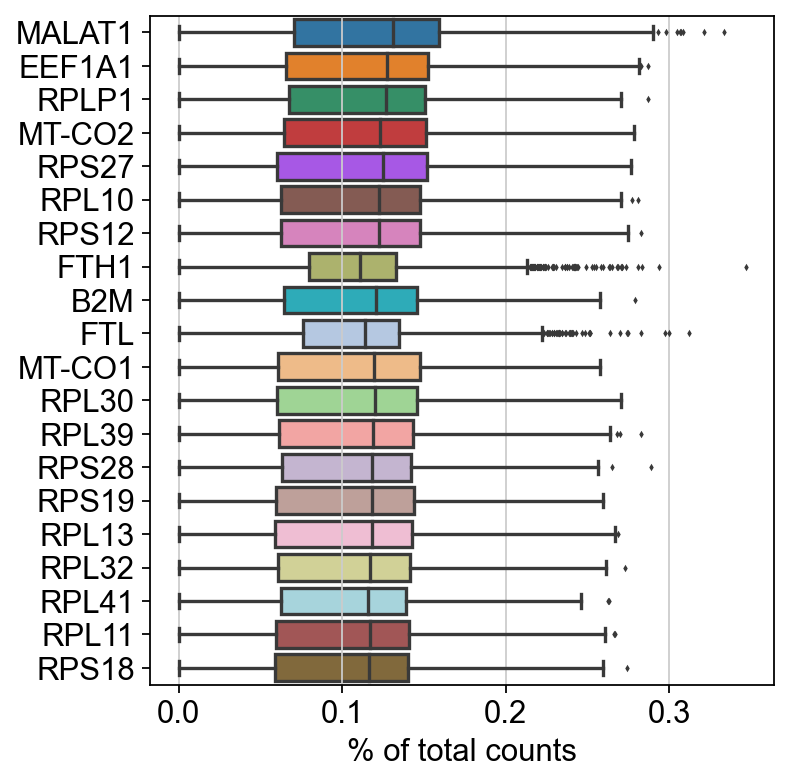

In [11]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [12]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 2175 genes that are detected in less than 3 cells


In [13]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

C:\Users\88695\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


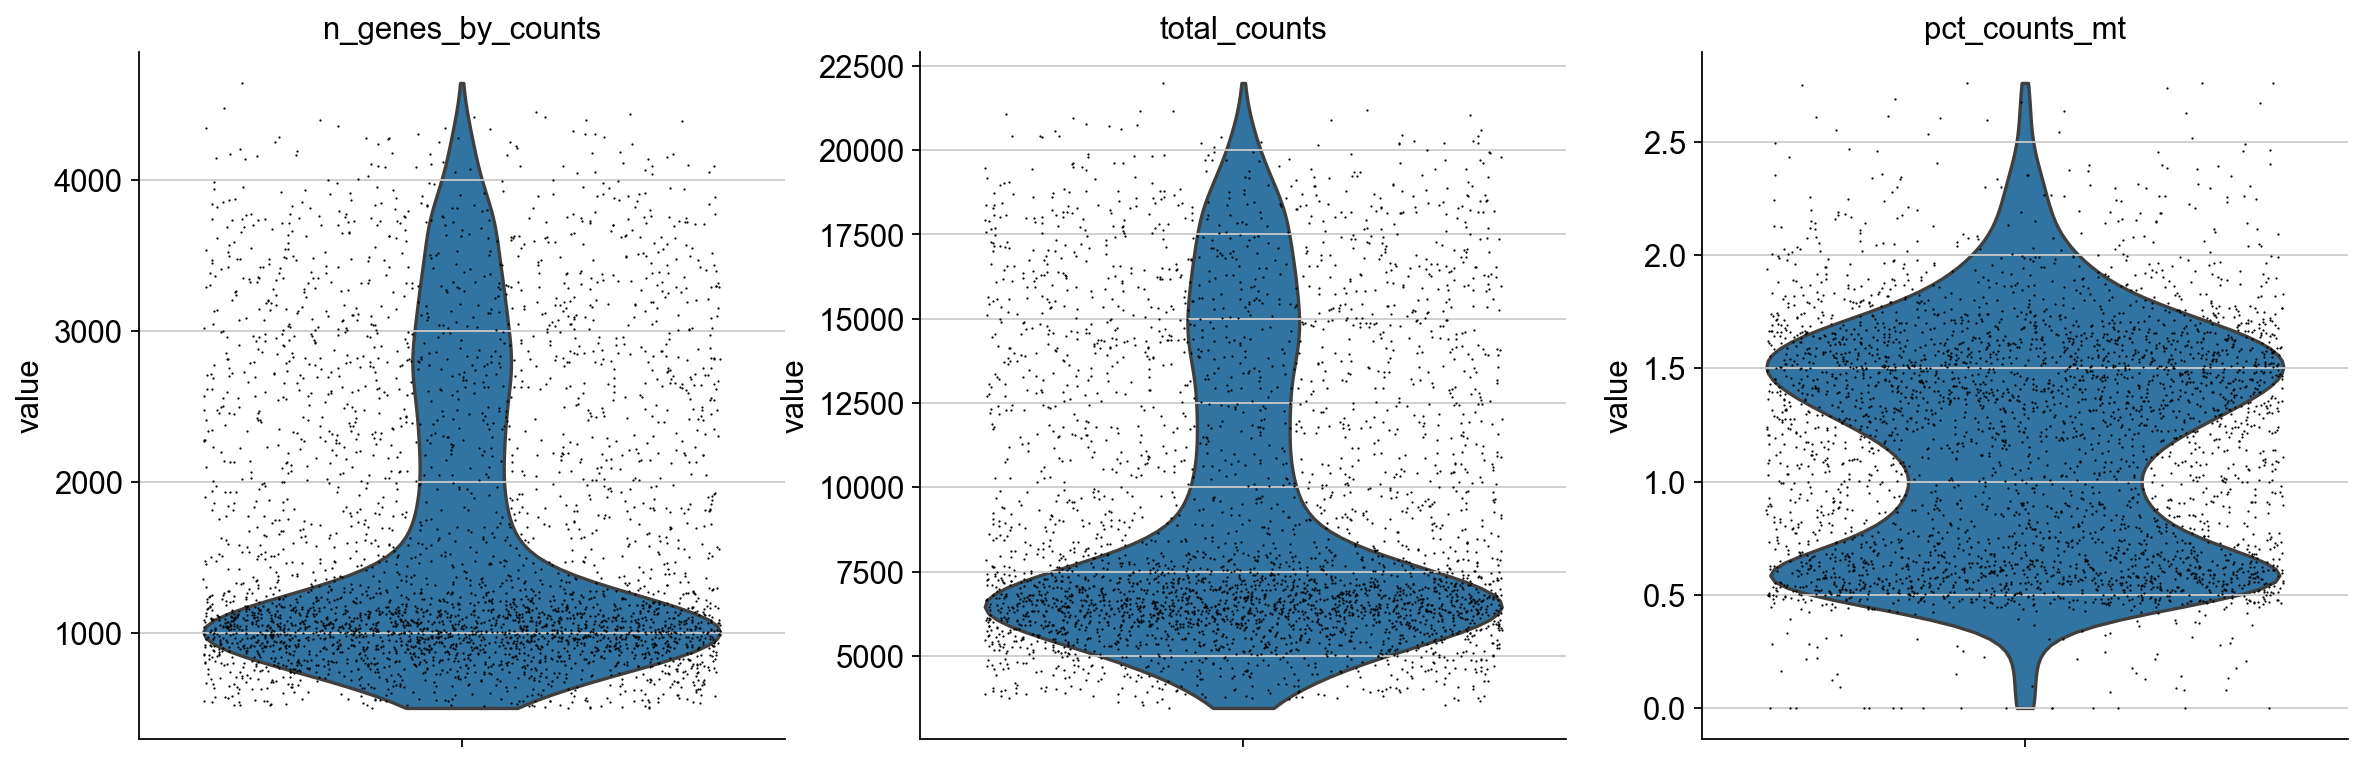

In [14]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

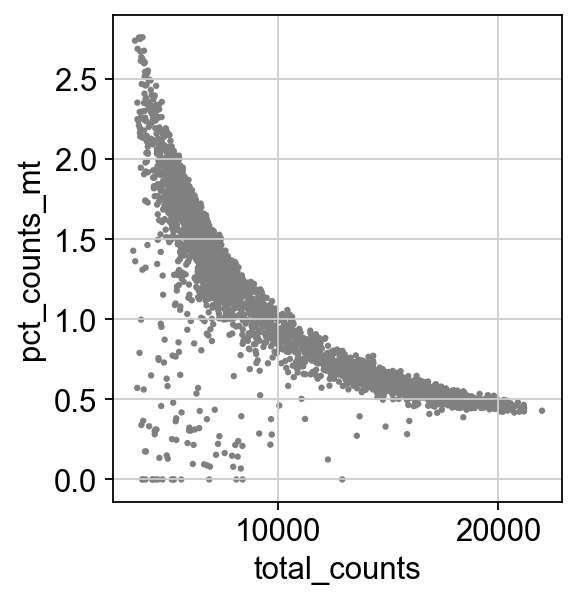

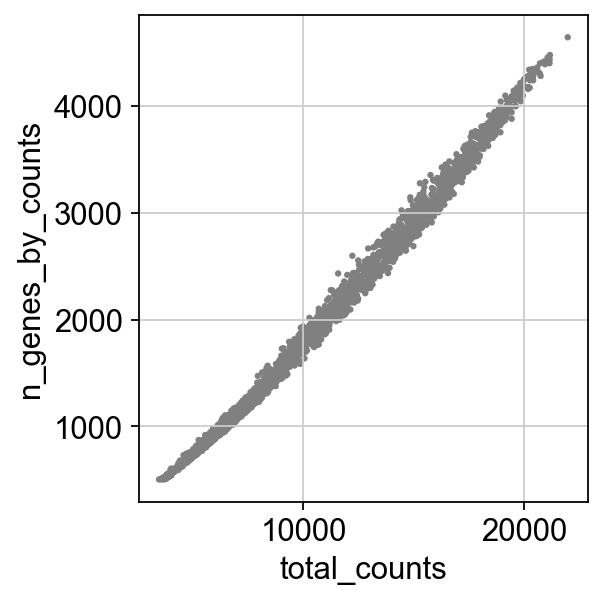

In [15]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt') # quality control 
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [16]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [17]:
sc.pp.normalize_total(adata, target_sum=1e4) 

normalizing counts per cell
    finished (0:00:00)


C:\Users\88695\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\preprocessing\_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [18]:
sc.pp.log1p(adata) # log make numbers readible

In [19]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


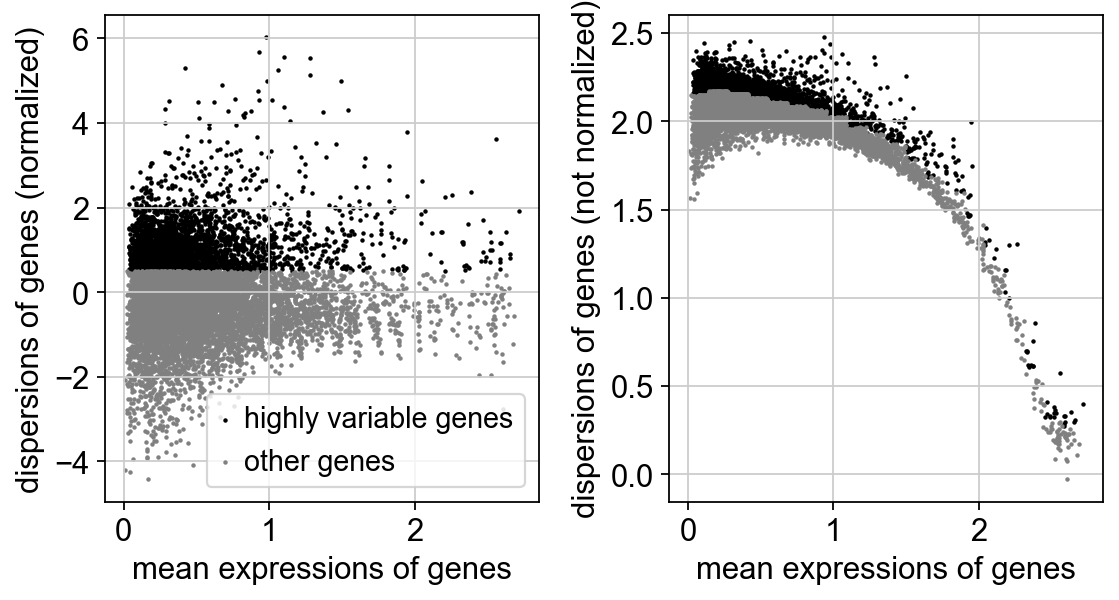

In [20]:
sc.pl.highly_variable_genes(adata)

In [21]:
adata.raw = adata

In [22]:
adata = adata[:, adata.var.highly_variable] # : all rows

In [23]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:34)


In [24]:
sc.pp.scale(adata, max_value=10)

In [25]:
sc.tl.pca(adata, svd_solver='arpack') # pca dimension reduction

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:02)


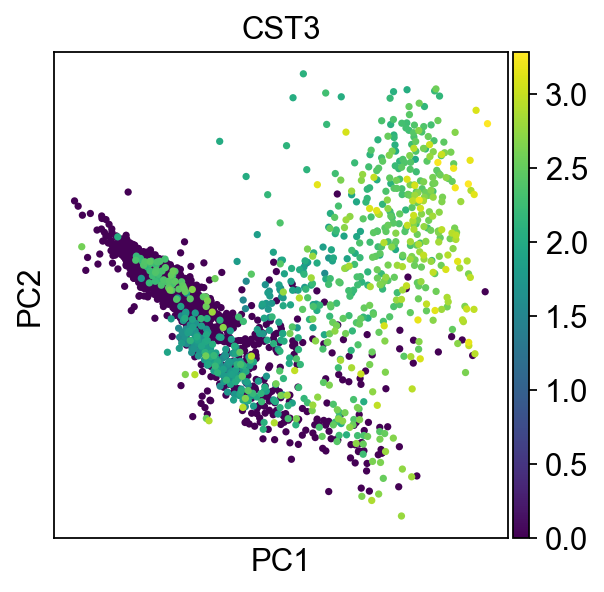

In [26]:
sc.pl.pca(adata, color='CST3')

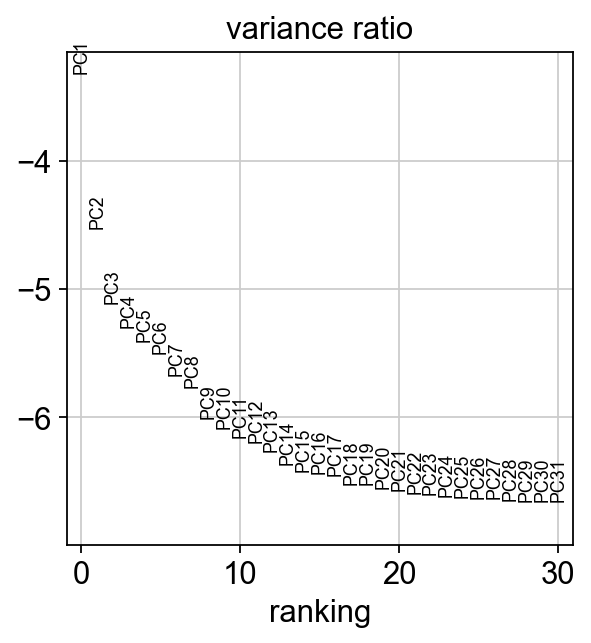

In [27]:
sc.pl.pca_variance_ratio(adata, log=True)

In [28]:
adata.write(results_file)

In [29]:
adata

AnnData object with n_obs × n_vars = 2802 × 3130
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [30]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:10)


In [31]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:15)


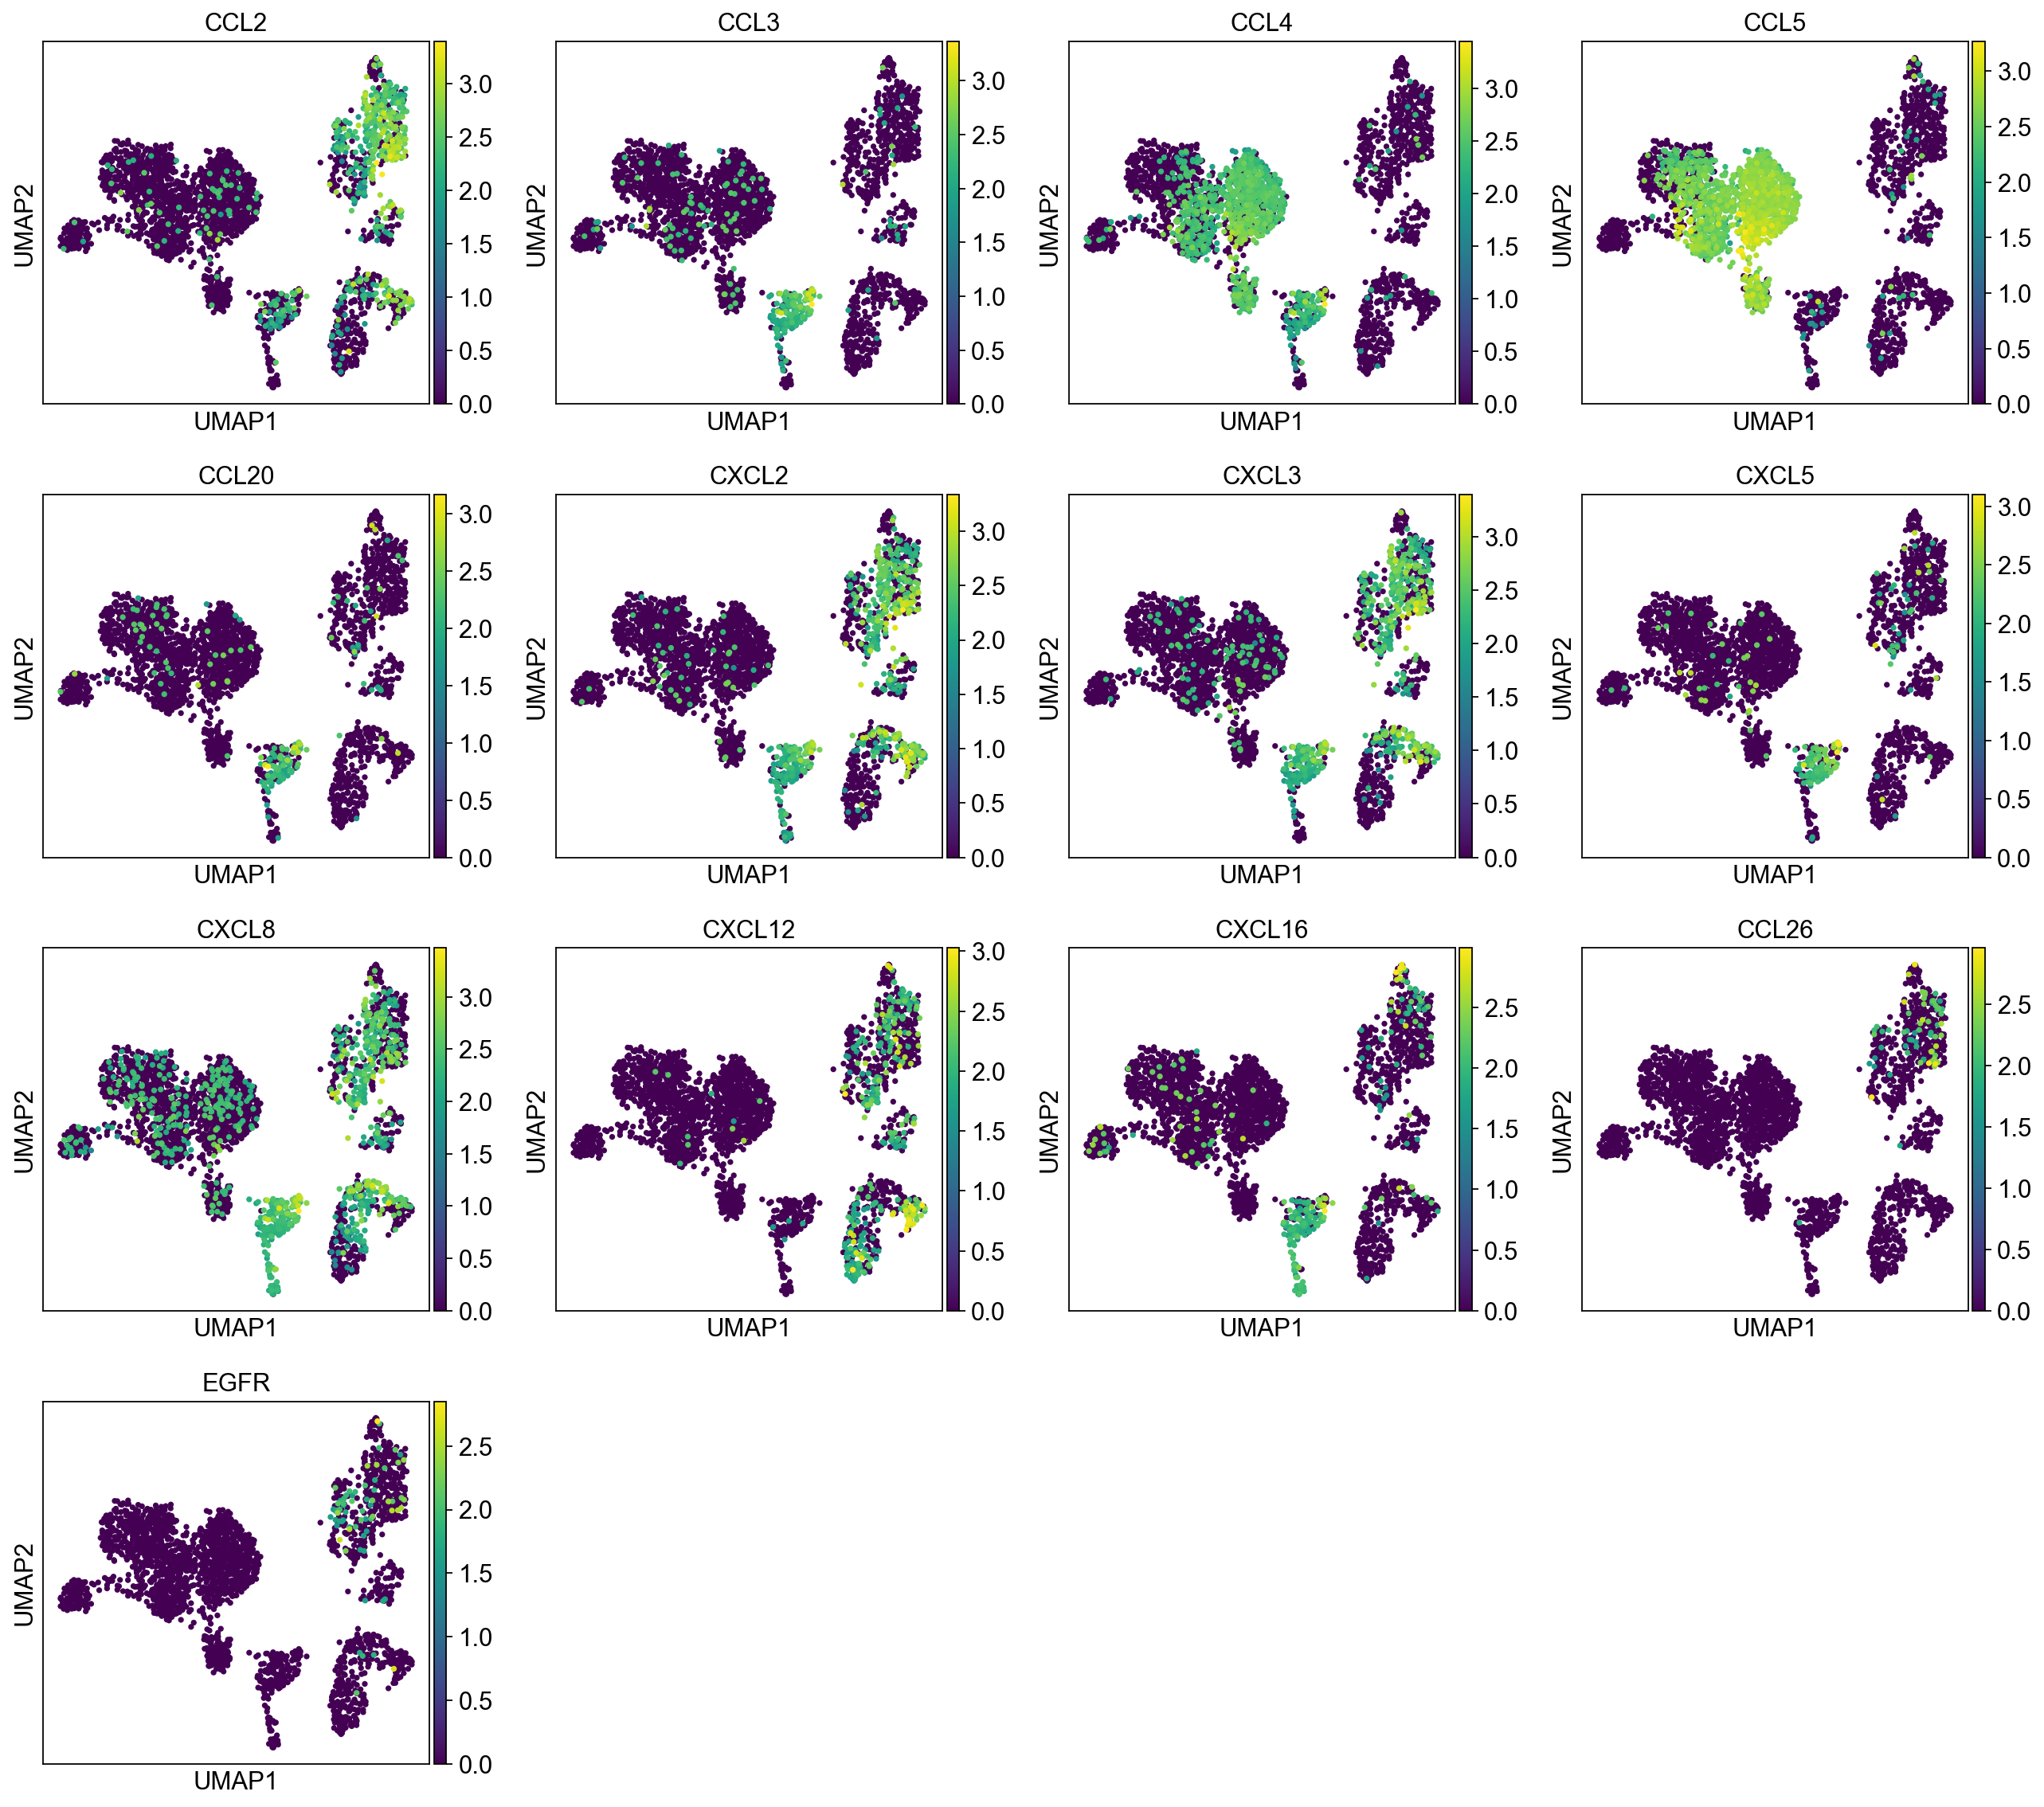

In [32]:
sc.pl.umap(adata, color=[ 'CCL2', 'CCL3', 'CCL4', 'CCL5', 'CCL20', 'CXCL2', 
    'CXCL3', 'CXCL5',  'CXCL8', 'CXCL12', 'CXCL16', 'CCL26', 'EGFR'] ) 
# Chemokines

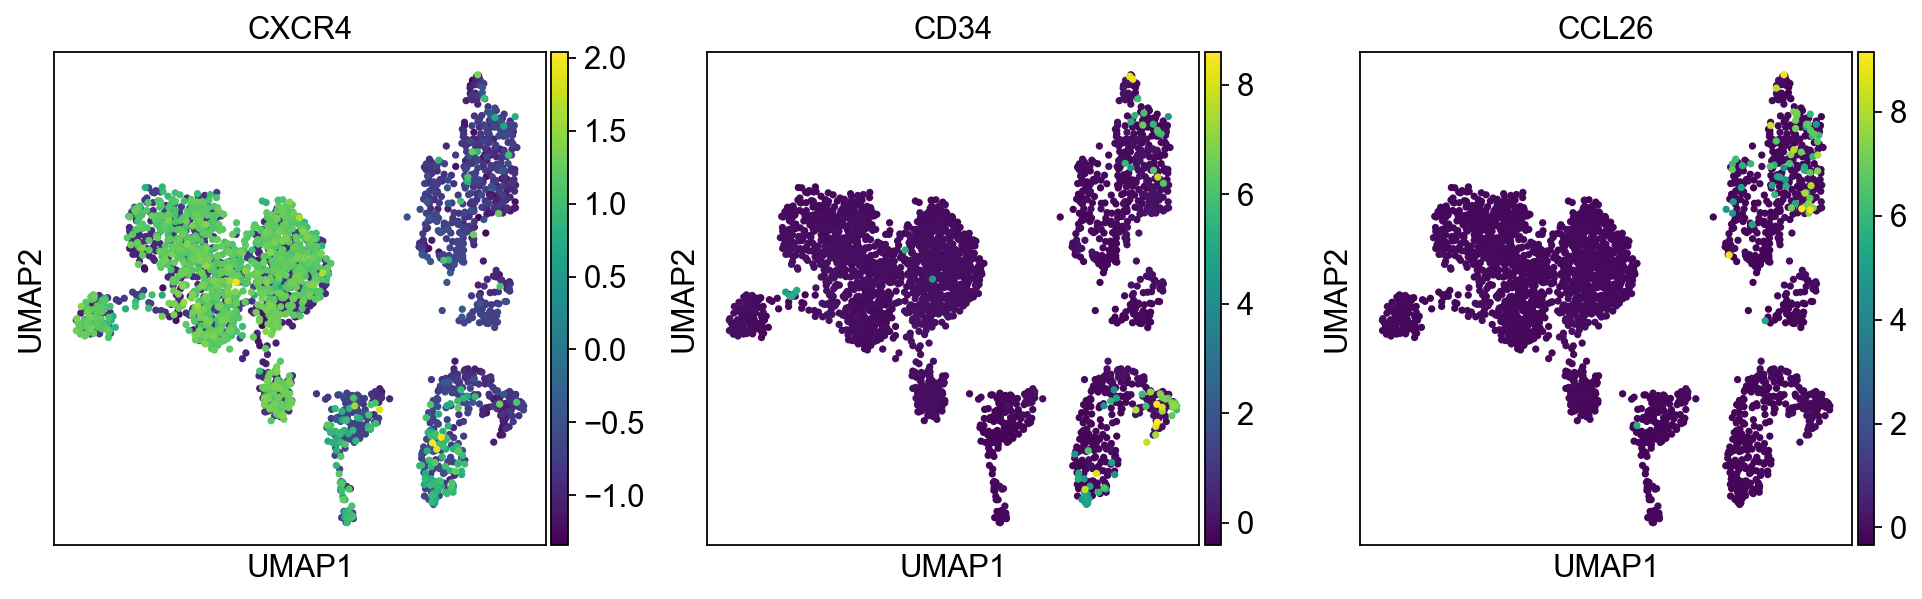

In [33]:
sc.pl.umap(adata, color=['CXCR4','CD34', 'CCL26'], use_raw=False)

In [34]:
sc.tl.leiden(adata, resolution = 0.2)

running Leiden clustering
    finished: found 8 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


C:\Users\88695\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


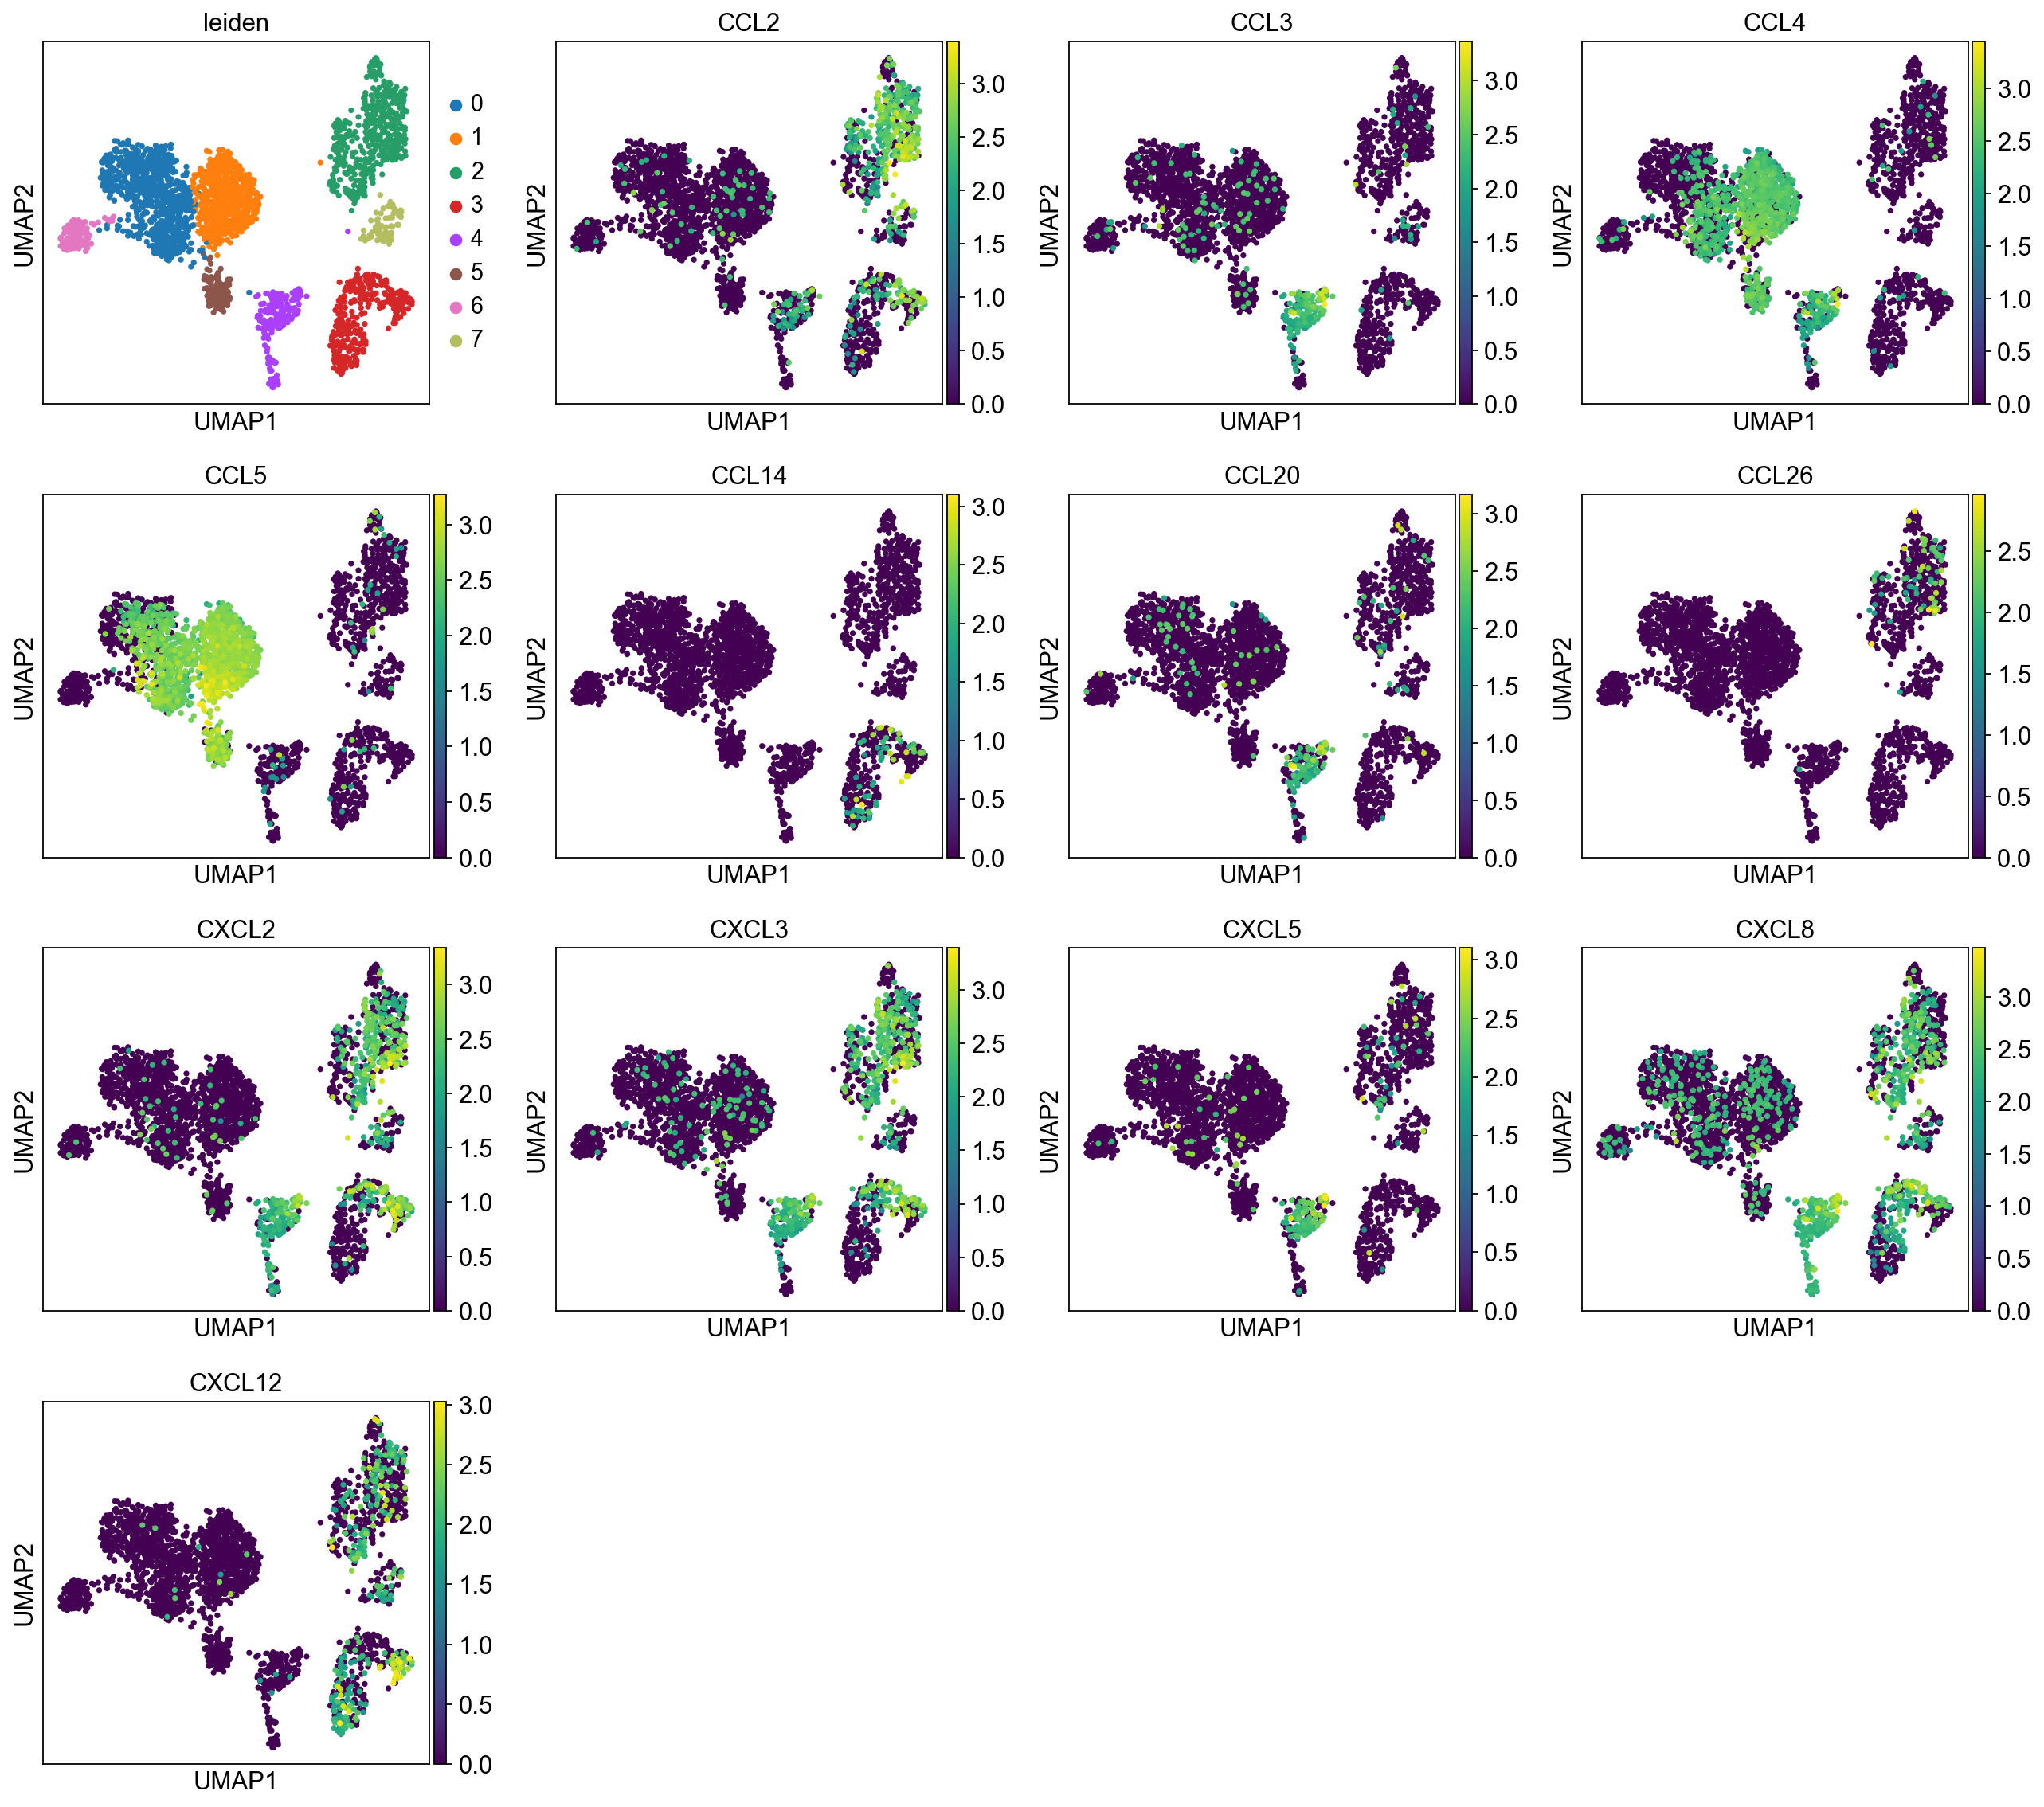

In [35]:
sc.pl.umap(adata, color=['leiden', 'CCL2', 'CCL3', 'CCL4', 'CCL5', 'CCL14', 'CCL20', 'CCL26', 'CXCL2',
    'CXCL3', 'CXCL5',  'CXCL8',  'CXCL12'])

In [36]:
adata.write(results_file)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


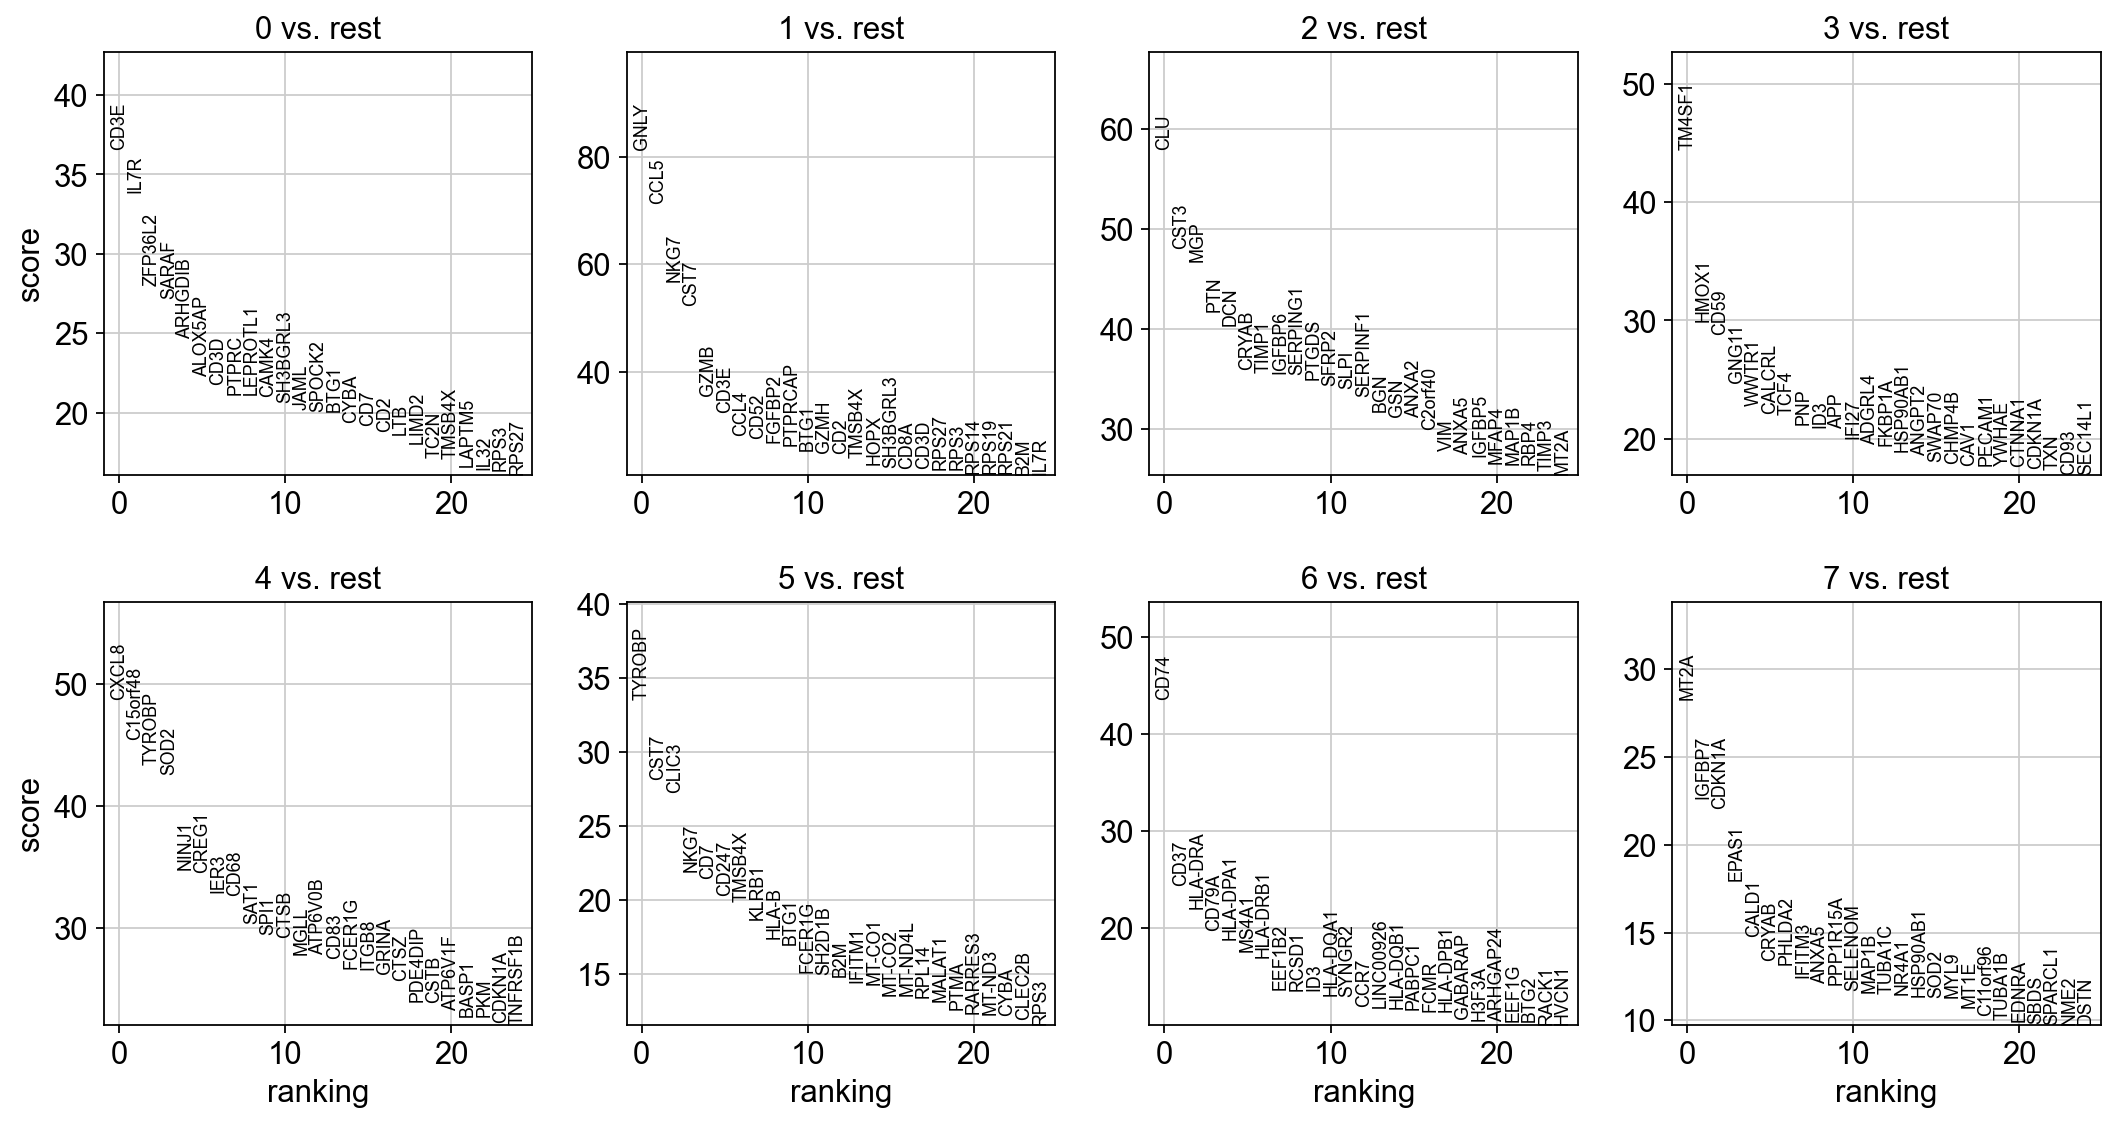

In [37]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [38]:
# Check significant gene expression 
all_genes = list(adata.var['gene_ids'].values)  
'EGFR' in all_genes

False

In [39]:
adata.obs

n_genes  n_genes_by_counts  total_counts  \
MEN09_AAACCTGCACATAACC-1     1607               1607   9166.088867   
MEN09_AAACCTGCATCTGGTA-1      937                937   6220.786621   
MEN09_AAACCTGTCAGAGACG-1      849                849   5507.537598   
MEN09_AAACCTGTCGGCGCTA-1     1600               1600   8914.195312   
MEN09_AAACGGGGTGTAAGTA-1      787                787   5399.437012   
...                           ...                ...           ...   
MEN09_TTTGGTTCAATCGGTT-1      969                969   6325.137695   
MEN09_TTTGGTTTCTGCCCTA-1      992                992   6373.757812   
MEN09_TTTGTCAAGATAGTCA-1     1186               1186   7236.237793   
MEN09_TTTGTCATCAGCGATT-1      810                810   5339.337891   
MEN09_TTTGTCATCATGTCTT-1     1024               1024   6597.357422   

                          total_counts_mt  pct_counts_mt leiden  
MEN09_AAACCTGCACATAACC-1        26.290112       0.286819      2  
MEN09_AAACCTGCATCTGGTA-1       103.177765       1.658597      0  
MEN09_AAACCTGTCAGAGACG-1       102.825104       1.866989      3  
MEN09_AAACCTGTCGGCGCTA-1        88.482147       0.992598      2  
MEN09_AAACGGGGTGTAAGTA-1        98.445831       1.823261      5  
...                                   ...            ...    ...  
MEN09_TTTGGTTCAATCGGTT-1        99.507370       1.573205      1  
MEN09_TTTGGTTTCTGCCCTA-1        99.895828       1.567299      1  
MEN09_TTTGTCAAGATAGTCA-1        85.617393       1.183175      2  
MEN09_TTTGTCATCAGCGATT-1        92.861954       1.739204      0  
MEN09_TTTGTCATCATGTCTT-1       102.202873       1.549149      1  

[2802 rows x 6 columns]

In [40]:
sc.settings.verbosity = 2  # reduce the verbosity

ranking genes
    finished (0:00:07)


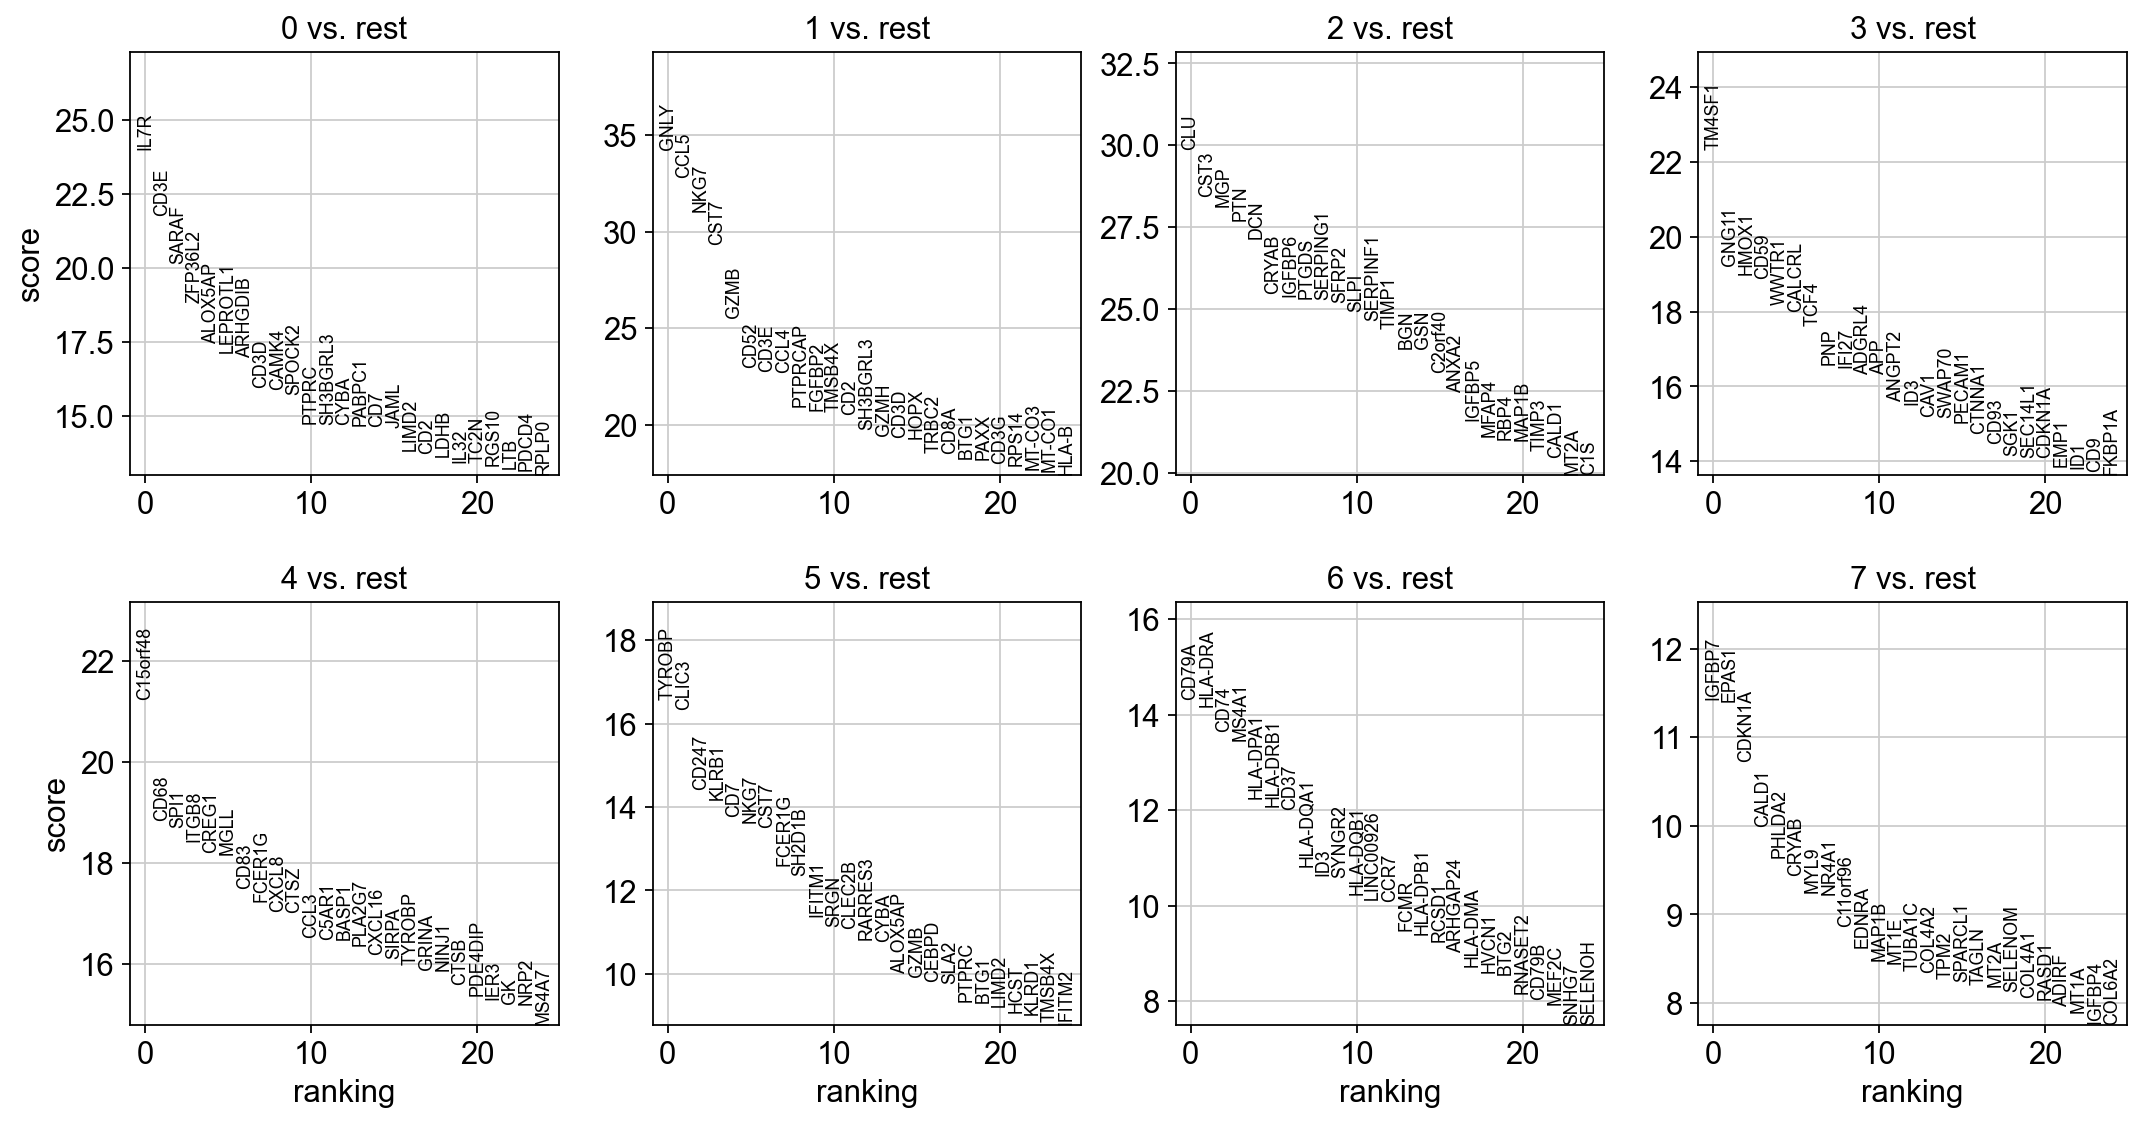

In [41]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [42]:
adata.write(results_file)

ranking genes
    finished (0:00:18)


C:\Users\88695\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


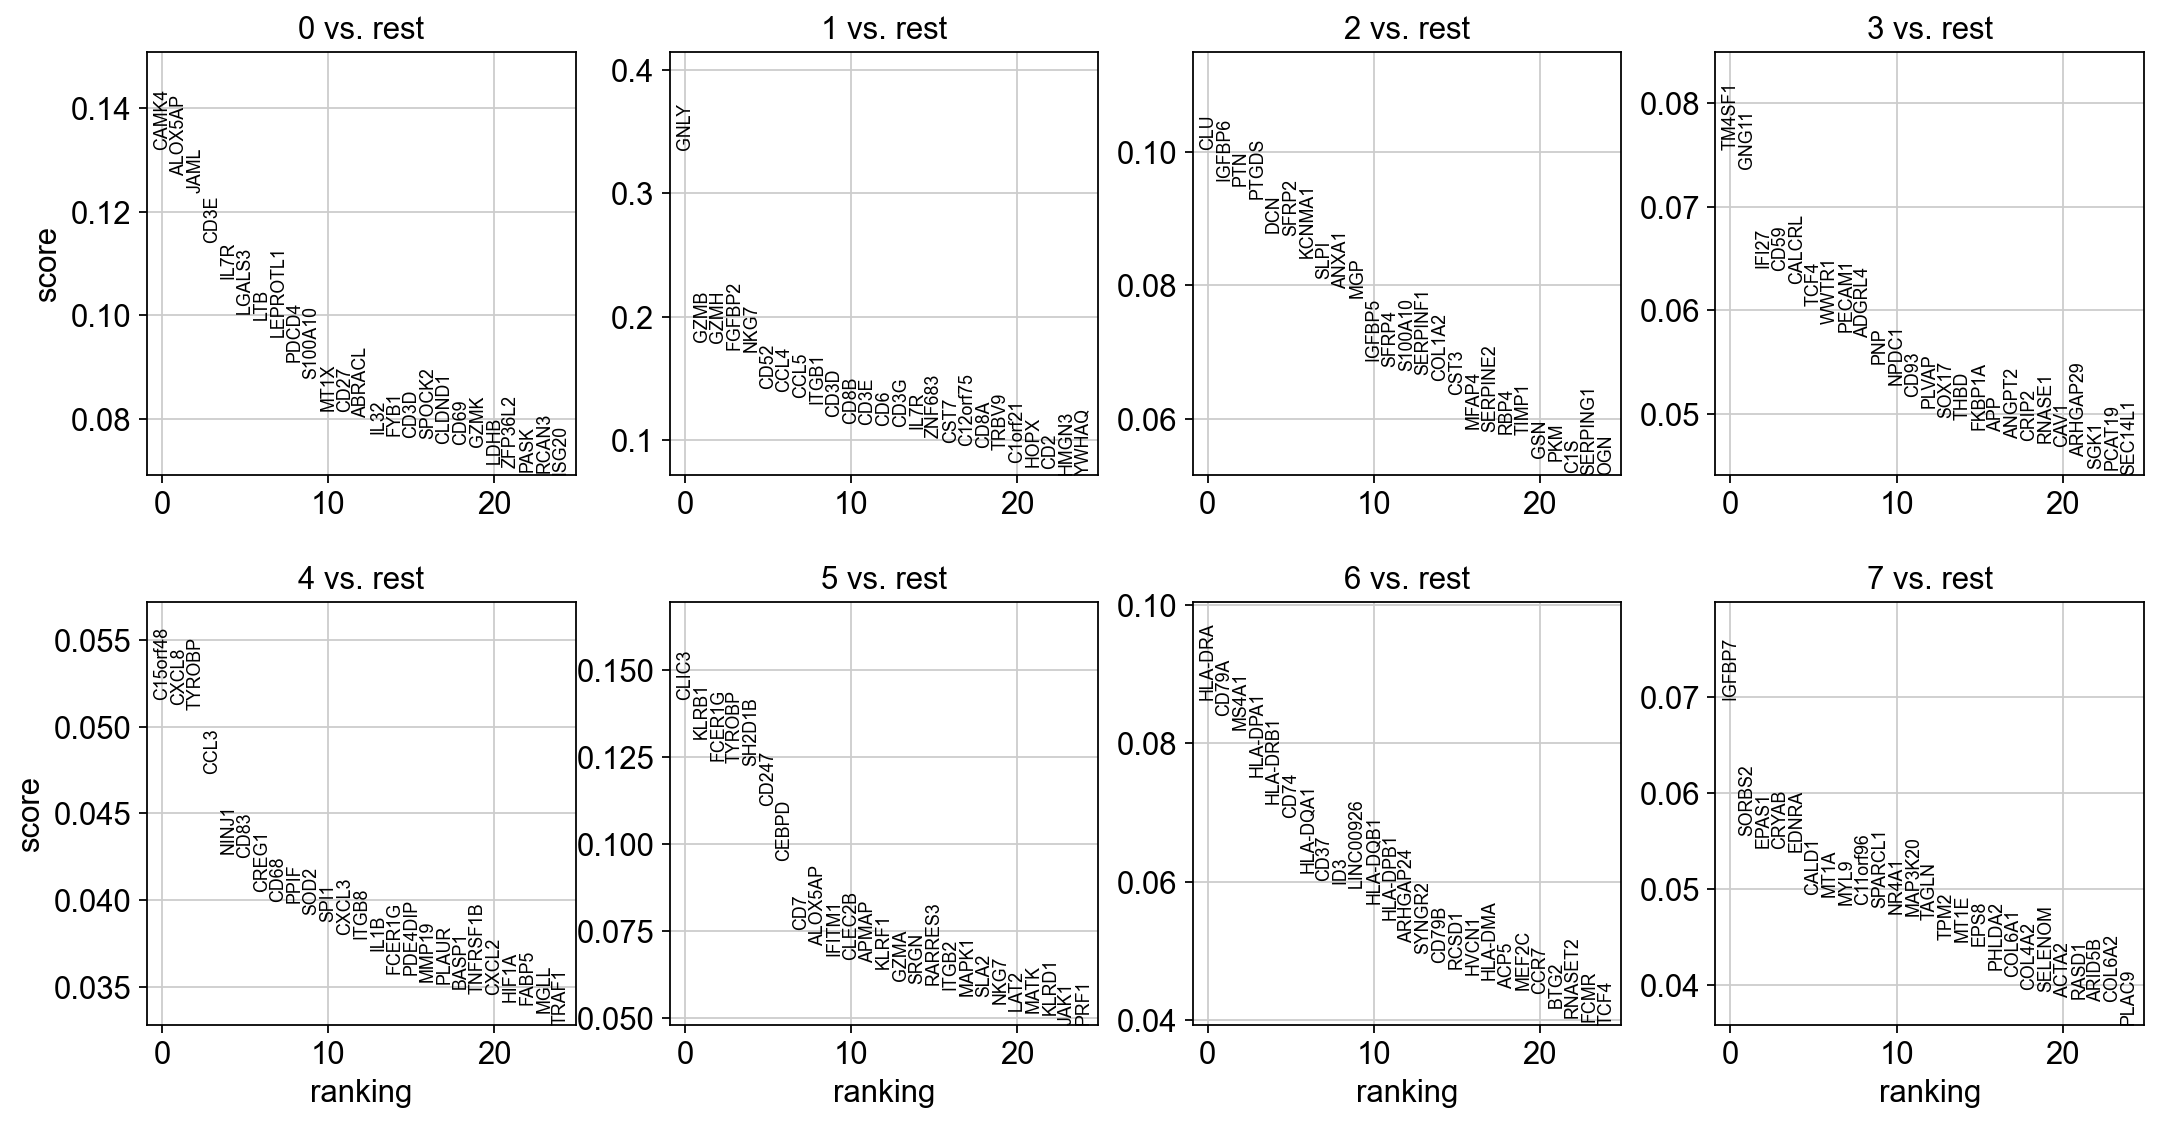

In [43]:
sc.tl.rank_genes_groups(adata, 'leiden', method='logreg')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [44]:
marker_genes = ['IL7R', 'CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ', 'CD14',
                'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'MS4A7', 'FCER1A', 'CST3', 'PPBP']

In [45]:
adata = sc.read(results_file)

In [46]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(5)

0     1     2       3         4       5         6       7
0     IL7R  GNLY   CLU  TM4SF1  C15orf48  TYROBP     CD79A  IGFBP7
1     CD3E  CCL5  CST3   GNG11      CD68   CLIC3   HLA-DRA   EPAS1
2    SARAF  NKG7   MGP   HMOX1      SPI1   CD247      CD74  CDKN1A
3  ZFP36L2  CST7   PTN    CD59     ITGB8   KLRB1     MS4A1   CALD1
4  ALOX5AP  GZMB   DCN   WWTR1     CREG1     CD7  HLA-DPA1  PHLDA2

In [47]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(5)

0_n            0_p   1_n            1_p   2_n            2_p     3_n  \
0     IL7R  1.757038e-127  GNLY  3.281644e-257   CLU  3.756072e-196  TM4SF1   
1     CD3E  2.931948e-105  CCL5  3.926001e-236  CST3  5.603726e-178   GNG11   
2    SARAF   1.647862e-90  NKG7  9.202500e-212   MGP  4.494024e-174   HMOX1   
3  ZFP36L2   3.483183e-79  CST7  3.034046e-189   PTN  6.543891e-169    CD59   
4  ALOX5AP   3.042233e-68  GZMB  2.863844e-144   DCN  2.394920e-162   WWTR1   

             3_p       4_n            4_p     5_n           5_p       6_n  \
0  1.677272e-110  C15orf48  4.463783e-100  TYROBP  8.914005e-62     CD79A   
1   2.290859e-82      CD68   4.214427e-79   CLIC3  6.055502e-60   HLA-DRA   
2   2.060370e-80      SPI1   5.419220e-78   CD247  3.497956e-47      CD74   
3   1.590600e-79     ITGB8   8.103855e-76   KLRB1  1.333883e-45     MS4A1   
4   6.951581e-74     CREG1   4.702996e-74     CD7  3.993847e-43  HLA-DPA1   

            6_p     7_n           7_p  
0  1.622661e-46  IGFBP7  2.996934e-30  
1  1.254598e-45   EPAS1  3.818557e-30  
2  2.159055e-42  CDKN1A  7.408096e-27  
3  2.627208e-41   CALD1  1.711464e-23  
4  1.648810e-34  PHLDA2  5.248035e-22

In [48]:
adata = sc.read(results_file)

C:\Users\88695\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


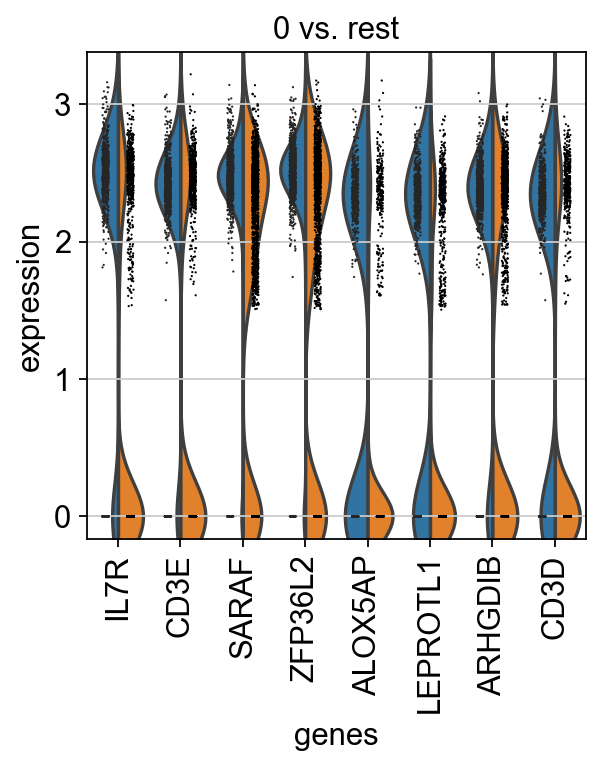

In [49]:
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)

In [50]:
sc.pl.violin(adata, ['CST3', 'NKG7', 'PPBP'], groupby='leiden')

KeyError: "Could not find keys '['PPBP']' in columns of `adata.obs` or in adata.raw.var_names."

In [ ]:
new_cluster_names = [
    'CD4 T', 'CD14 Monocytes',
    'B', 'CD8 T',
    'NK', 'FCGR3A Monocytes',
    'Dendritic', 'Megakaryocytes']
adata.rename_categories('leiden', new_cluster_names)

In [ ]:
sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', frameon=False, save='.pdf')

In [ ]:
sc.pl.dotplot(adata, marker_genes, groupby='leiden');

In [ ]:
sc.pl.stacked_violin(adata, marker_genes, groupby='leiden', rotation=90);

In [ ]:
adata

In [ ]:
adata.write(results_file, compression='gzip')  # `compression='gzip'` saves disk space, but slows down writing and subsequent reading

In [ ]:
adata.raw.to_adata().write('./write/pbmc3k_withoutX.h5ad')

In [ ]:
# Export single fields of the annotation of observations
# adata.obs[['n_counts', 'louvain_groups']].to_csv(
#     './write/pbmc3k_corrected_louvain_groups.csv')

# Export single columns of the multidimensional annotation
# adata.obsm.to_df()[['X_pca1', 'X_pca2']].to_csv(
#     './write/pbmc3k_corrected_X_pca.csv')

# Or export everything except the data using `.write_csvs`.
# Set `skip_data=False` if you also want to export the data.
# adata.write_csvs(results_file[:-5], )